<a href="https://colab.research.google.com/github/nathanmartinss/EXEMPLO-DW-DL/blob/main/Data_Warehouse_e_Data_Lake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando a biblioteca pandas como pd e a biblioteca numpy como np
import pandas as pd
import numpy as np

# Definindo o número de produtos como 600
num_produtos = 600

# Criando um dicionário 'produtos' com detalhes do produto como ID, nome e categoria usando valores aleatórios e sequências
produtos = {
    'produto_id': range(1, num_produtos + 1),  # Altere 'produto id' para 'produto_id'
    'nome': ['Produto {}'.format(i) for i in range(1, num_produtos + 1)],
    'categoria': np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos'], num_produtos)
}

# Convertendo o dicionário 'produtos' em um DataFrame pandas chamado 'df_produtos'
df_produtos = pd.DataFrame(produtos)

# Definindo o número de vendas como 1000
num_vendas = 1000

# Criando um dicionário 'data_vendas' com detalhes de vendas como data, ID do produto, quantidade e valor total usando valores aleatórios e sequências
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-01', periods=30), num_vendas),
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),
    'quantidade': np.random.randint(50, 200, num_vendas),
    'valor_total': np.random.randint(1000, 10000, num_vendas)
}

# Criando um DataFrame a partir dos dados existentes (data_vendas) usando a biblioteca pandas
df_vendas = pd.DataFrame(data_vendas)

# Salvando o DataFrame df_vendas em um arquivo CSV chamado 'vendas.csv' sem índice
df_vendas.to_csv('vendas.csv', index=False)

# Salvando outro DataFrame (presumivelmente definido anteriormente) df_produtos em um arquivo CSV chamado 'produtos.csv' sem índice
df_produtos.to_csv('produtos.csv', index=False)

# Lendo o arquivo 'vendas.csv' em um DataFrame df_vendas
df_vendas = pd.read_csv('vendas.csv')

# Lendo o arquivo 'produtos.csv' em um DataFrame df_produtos
df_produtos = pd.read_csv('produtos.csv')

# Mesclando os DataFrames df_vendas e df_produtos na coluna 'produto_id' usando o método de junção interna
df_merge = pd.merge(df_vendas, df_produtos, on='produto_id', how='inner')

# Salvando o DataFrame mesclado em um novo arquivo CSV chamado 'data_warehouse.csv' sem índice
df_merge.to_csv('data_warehouse.csv', index=False)

# Lendo o arquivo 'data_warehouse.csv' em um novo DataFrame df_warehouse
df_warehouse = pd.read_csv('data_warehouse.csv')

# Imprimindo "Conteúdo do Data Warehouse:"
print("Conteúdo do Data Warehouse:")

# Imprimindo o conteúdo do DataFrame df_warehouse
print(df_warehouse)

Conteúdo do Data Warehouse:
           data  produto_id  quantidade  valor_total         nome    categoria
0    2024-04-06         114          73         8615  Produto 114  Eletrônicos
1    2024-04-02         114         121         5346  Produto 114  Eletrônicos
2    2024-04-17         265         169         4601  Produto 265  Eletrônicos
3    2024-04-07         265         116         9561  Produto 265  Eletrônicos
4    2024-04-03         265         172         4180  Produto 265  Eletrônicos
..          ...         ...         ...          ...          ...          ...
995  2024-04-19         254          95         2887  Produto 254    Alimentos
996  2024-04-10         448         101         6206  Produto 448       Roupas
997  2024-04-02         196         124         7467  Produto 196       Roupas
998  2024-04-13         588          87         4750  Produto 588  Eletrônicos
999  2024-04-26         163         134         4616  Produto 163  Eletrônicos

[1000 rows x 6 columns]

Análise de vendas por produto:
             quantidade  valor_total
nome                                
Produto 1           443        25286
Produto 10          186         4628
Produto 100         104         2165
Produto 101         129         8558
Produto 102         644        16478
...                 ...          ...
Produto 94          286        15093
Produto 95          247        11330
Produto 96          507        22688
Produto 97          188         9016
Produto 99          306        12842

[494 rows x 2 columns]
Análise de vendas por categoria de produto:
             quantidade  valor_total
categoria                           
Alimentos         43831      1952013
Eletrônicos       41471      1809903
Roupas            39042      1732050
Análise de tendências temporais:
            quantidade  valor_total
data                               
2024-04-01        3506       157838
2024-04-02        4975       235187
2024-04-03        3876       202621
2024-04-04        4243

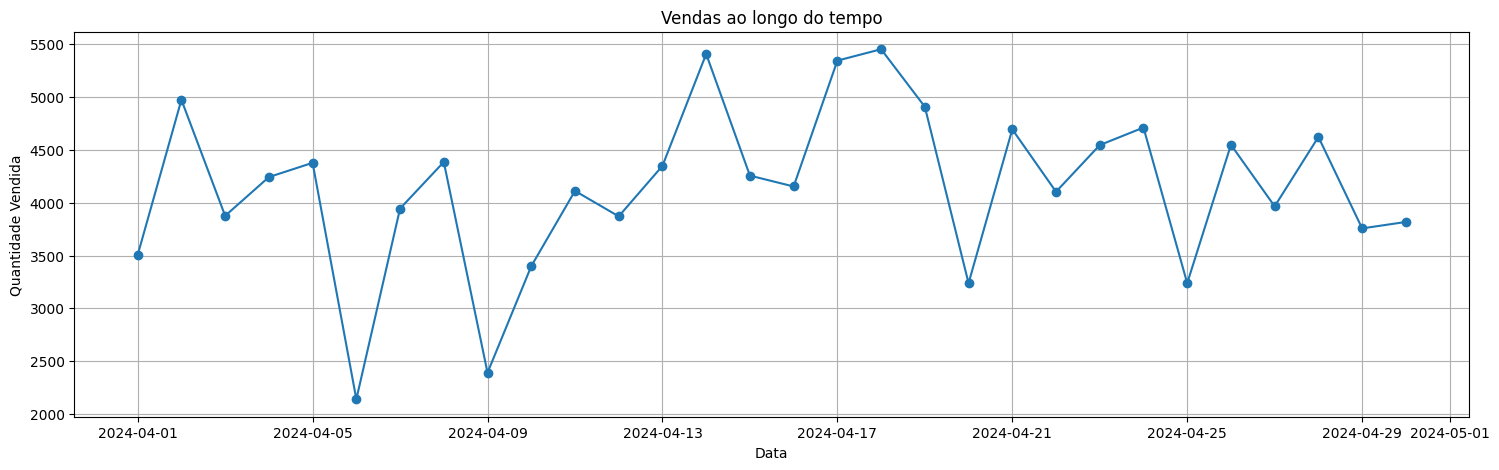

Análise de desempenho de produtos:
nome
Produto 1      25286
Produto 10      4628
Produto 100     2165
Produto 101     8558
Produto 102    16478
               ...  
Produto 94     15093
Produto 95     11330
Produto 96     22688
Produto 97      9016
Produto 99     12842
Name: valor_total, Length: 494, dtype: int64


In [2]:
# Importando a biblioteca pandas como pd e a biblioteca matplotlib.pyplot como plt
import pandas as pd
import matplotlib.pyplot as plt

# Lendo um arquivo CSV chamado 'data_warehouse.csv' em um DataFrame df_warehouse
df_warehouse = pd.read_csv('data_warehouse.csv')

# Agrupando o DataFrame por nome do produto e calculando a soma de 'quantidade' e 'valor_total' para cada produto
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade', 'valor_total']].sum()

# Imprimindo a análise de vendas por produto
print("Análise de vendas por produto:")
print(vendas_por_produto)

# Agrupando o DataFrame por categoria do produto e calculando a soma de 'quantidade' e 'valor_total' para cada categoria
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade', 'valor_total']].sum()

# Imprimindo a análise de vendas por categoria de produto
print("Análise de vendas por categoria de produto:")
print(vendas_por_categoria)

# Convertendo a coluna 'data' para o formato datetime
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])

# Agrupando o DataFrame por data e calculando a soma de 'quantidade' e 'valor_total' para cada data
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()

# Imprimindo a análise de tendências temporais
print("Análise de tendências temporais:")
print(vendas_por_data)

# Criando um gráfico de vendas ao longo do tempo
plt.figure(figsize=(18, 5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o', linestyle='-')
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()

# Agrupando o DataFrame por nome do produto e calculando a soma de 'valor_total' para cada produto
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()

# Imprimindo a análise de desempenho de produtos
print("Análise de desempenho de produtos:")
print(desempenho_produto)

In [15]:
# Importando a biblioteca pandas como pd e a biblioteca numpy como np
import pandas as pd
import numpy as np

# Importando o módulo os para interagir com o sistema operacional
import os

# Verificando se um diretório chamado 'data_lake' existe, se não, ele cria um
if not os.path.exists('data_lake'):
    os.makedirs('data_lake')

# Definindo o número de arquivos a serem criados como 10
num_files = 10

# Definindo o número de linhas por arquivo como 1000
num_rows_per_file = 1000

# Criando uma lista vazia chamada dfs para armazenar objetos DataFrame
dfs = []

# Loop através de um intervalo igual a num_files (10 neste caso)
for i in range(num_files):

    # Criando um dicionário chamado data com três pares chave-valor, onde as chaves são nomes de colunas
    # e os valores são arrays de números ou letras aleatórios gerados usando numpy
    data = {
        'coluna1': np.random.randint(0, 100, num_rows_per_file),
        'coluna2': np.random.randn(num_rows_per_file),
        'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_file)
    }

    # Cria um dataframe chamado df, a partir do conjunto de dados chamados data.
    df = pd.DataFrame(data)

    # É o nome do arquivo gerado, e irá aumentando cada vez que ele vai criando
    file_name = f'data_lake/dados_{i+1}.csv'
    # Salvando o dataframe como arquivo CSV no local especificado
    df.to_csv(file_name, index=False)

    # Aqui salva o nome e adiciona o nome do arquivo e o dataframe é adicionado a lista dfs.
    dfs.append((file_name, df))

print("Dados do Data Lake gerados com sucesso!")

# ste é o início de um loop que percorre cada tupla na lista dfs. Cada tupla contém um nome de arquivo e um DataFrame.
for file_name, df in dfs:
    # Dentro do loop, esta linha imprime o nome do arquivo atual.
    print(f"Dados do Arquivo: {file_name}")
    #  Esta linha imprime as primeiras cinco linhas do DataFrame atual.
    print(df.head())


Dados do Data Lake gerados com sucesso!
Dados do Arquivo: data_lake/dados_1.csv
   coluna1   coluna2 coluna3
0        1  0.279873       A
1       75  0.552419       C
2       48  1.338562       A
3       78 -0.098263       C
4       68 -0.038232       B
Dados do Arquivo: data_lake/dados_2.csv
   coluna1   coluna2 coluna3
0       29 -0.014257       B
1       18 -1.393658       B
2       19  0.377641       C
3       31  0.564720       C
4       88  0.694630       A
Dados do Arquivo: data_lake/dados_3.csv
   coluna1   coluna2 coluna3
0       66 -0.102383       B
1       82 -0.069148       C
2       60  2.475641       A
3       73 -0.130030       A
4       72  1.001183       B
Dados do Arquivo: data_lake/dados_4.csv
   coluna1   coluna2 coluna3
0       63 -1.161361       A
1       37  0.617186       B
2       25 -1.223931       C
3        6  0.277269       B
4       51  0.625589       C
Dados do Arquivo: data_lake/dados_5.csv
   coluna1   coluna2 coluna3
0       95 -0.777192       A
1     

In [20]:
from sqlalchemy import create_engine
import pandas as pd
import os

# Criar uma conexão com o banco de dados SQLite
conn_string = 'sqlite:///data_lake.db'
engine = create_engine(conn_string)

# Verifica se o diretório 'data_lake' existe; se não, cria o diretório
if not os.path.exists('data_lake'):
    os.makedirs('data_lake')

# Define o número de arquivos a serem criados e o número de linhas por arquivo
num_files = 10
num_rows_per_file = 1000

# Loop para gerar dados aleatórios e salvar em CSV
for i in range(1, num_files + 1):
    # Gera dados aleatórios para cada arquivo
    data = {
        'coluna1': np.random.randint(0, 100, num_rows_per_file),
        'coluna2': np.random.randn(num_rows_per_file),
        'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_file)
    }

    # Cria um DataFrame com os dados gerados
    df = pd.DataFrame(data)

    # Salva o DataFrame em um arquivo CSV no diretório 'data_lake' e adiciona ao banco de dados
    file_name = f'data_lake/dados_{i}.csv'
    df.to_csv(file_name, index=False)
    table_name = file_name.split('/')[-1].split('.')[0]
    df.to_sql(table_name, engine, if_exists='replace', index=False)

    # Imprime os primeiros registros do DataFrame salvo no arquivo CSV
    print(f"\nDados do arquivo {file_name}:\n")
    print(df.head())

engine.dispose()


Dados do arquivo data_lake/dados_1.csv:

   coluna1   coluna2 coluna3
0       43 -0.855750       C
1       64  1.020439       A
2       35 -1.719080       A
3        7 -0.777151       B
4        2  0.508808       B

Dados do arquivo data_lake/dados_2.csv:

   coluna1   coluna2 coluna3
0       79  0.580044       B
1        2  1.674999       C
2       55  0.665730       B
3       45  0.615565       C
4       57 -1.017419       C

Dados do arquivo data_lake/dados_3.csv:

   coluna1   coluna2 coluna3
0       73 -0.712772       A
1       52  2.112882       C
2       17 -0.483140       A
3        4 -0.134953       A
4       81 -2.017853       C

Dados do arquivo data_lake/dados_4.csv:

   coluna1   coluna2 coluna3
0       66 -0.508646       A
1       27 -0.547254       C
2       88  0.437135       A
3       97 -1.031310       C
4       17  2.229030       C

Dados do arquivo data_lake/dados_5.csv:

   coluna1   coluna2 coluna3
0       46  0.747541       A
1       40  0.193252       A
2      

Primeiras linhas do DataFrame:
   coluna1   coluna2 coluna3
0       43 -0.855750       C
1       64  1.020439       A
2       35 -1.719080       A
3        7 -0.777151       B
4        2  0.508808       B

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

Resumo estatístico do DataFrame:
          coluna1      coluna2
count  1000.00000  1000.000000
mean     50.13400     0.041205
std      28.85031     0.955877
min       0.00000    -2.729030
25%      26.00000    -0.619464
50%      50.00000     0.053374
75%      75.00000     0.677196
max      99.00000     2.762188


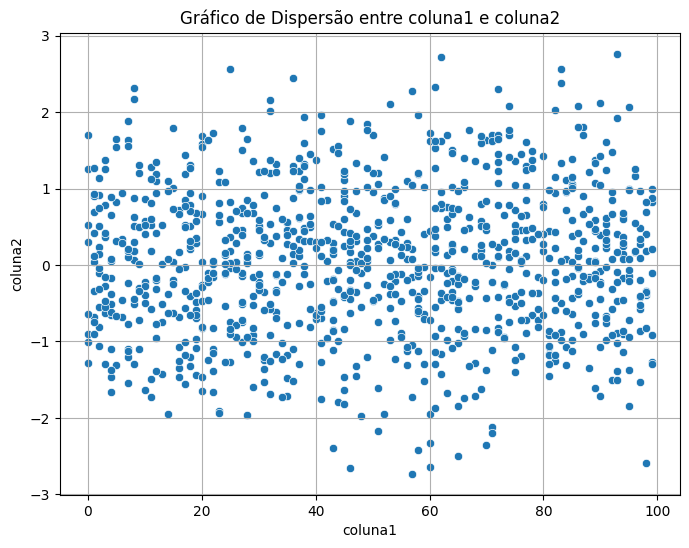

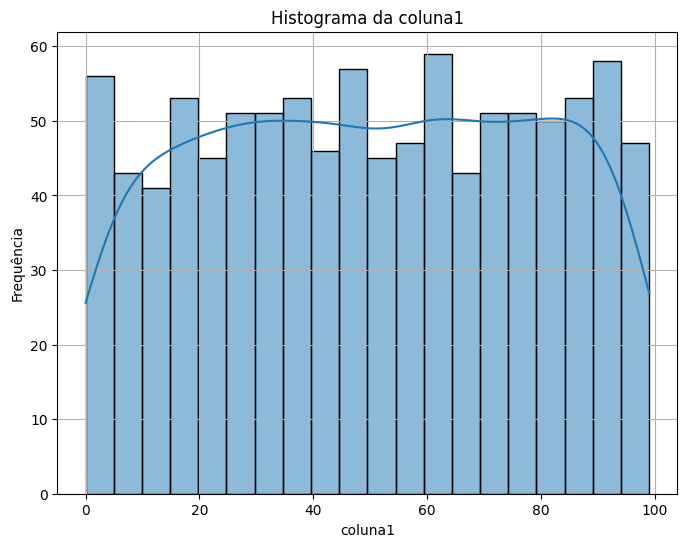

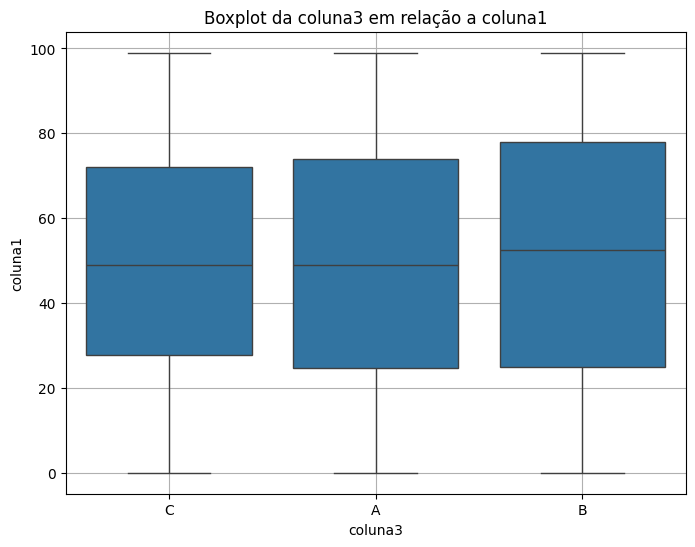

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Criar uma conexão com o banco de dados SQLite
conn_string = 'sqlite:///data_lake.db'
engine = create_engine(conn_string)

# Carregar dados do banco de dados para um DataFrame
table_name = 'dados_1'
df = pd.read_sql_table(table_name, engine)

# Imprimir as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")
print(df.head())

# Imprimir informações sobre o DataFrame, incluindo tipo de dados e memória usada
print("\nInformações sobre o DataFrame:")
print(df.info())

# Imprimir um resumo estatístico do DataFrame, incluindo média, desvio padrão, mínimo, máximo, etc.
print("\nResumo estatístico do DataFrame:")
print(df.describe())

# Criar um gráfico de dispersão usando as colunas 'coluna1' e 'coluna2' do DataFrame
plt.figure(figsize=(8,6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title("Gráfico de Dispersão entre coluna1 e coluna2")
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()

# Criar um histograma da coluna 'coluna1' com 20 bins e KDE (Kernel Density Estimation)
plt.figure(figsize=(8,6))
sns.histplot(df['coluna1'], bins=20, kde=True)
plt.title('Histograma da coluna1')
plt.xlabel('coluna1')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Criar um boxplot da coluna 'coluna3' em relação à coluna 'coluna1'
plt.figure(figsize=(8,6))
sns.boxplot(x='coluna3', y='coluna1', data=df)
plt.title('Boxplot da coluna3 em relação a coluna1')
plt.xlabel('coluna3')
plt.ylabel('coluna1')
plt.grid(True)
plt.show()
